In [105]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

### 两个函数线型

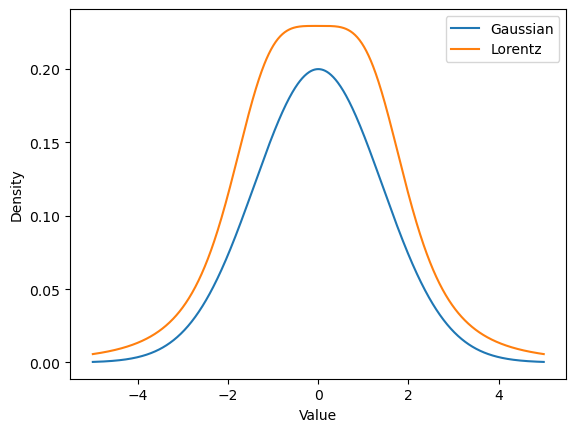

In [106]:
a = 1/4
b = 1/16
A = 0.2294383
B = 0.2

PI = np.pi  
F = lambda x: A/(1+b*x**4)
p = lambda x: B*np.exp(-a*x**2)

x = np.linspace(-5, 5, 1000)

plt.plot(x, p(x), label='Gaussian')
plt.plot(x, F(x), label='Lorentz')

# 添加图例和标签
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')

# 显示图形
plt.show()

### 乘分布取样F(x)

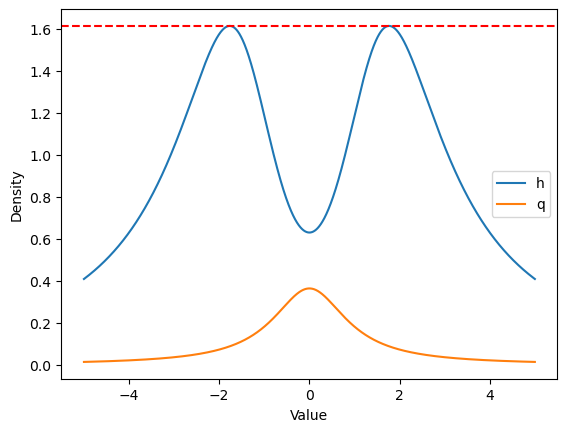

In [107]:
C = 0.3640598
q = lambda x: C/(1+x**2)
h = lambda x: F(x)/q(x)

x = np.linspace(-5, 5, 10000)
M = max(h(x))

plt.plot(x, h(x), label='h')
plt.plot(x, q(x), label='q')
plt.axhline(y=M, color='red', linestyle='--')


# 添加图例和标签
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')

# 显示图形
plt.show()

In [108]:
n = 100000
r1 = np.array([random.uniform(0, 1) for _ in range(n)])
rx = np.tan((r1-0.5)/C)
r2 = np.array([random.uniform(0, 1) for _ in range(n)])
x1 = [rx[i] for i in range(n) if M*r2[i] <= h(rx[i])]

### 由F(x)简单取样p(x)

In [109]:
r3 = np.array([random.uniform(0, 1) for _ in range(n)])
x = [x1[i] for i in range(len(x1)) if F(x1[i])*r3[i] <= p(x1[i])]
print("First rate of sampling is %f"%(len(x1)/n))
print("Second rate of sampling is %f"%(len(x)/len(x1)))
print("Total rate of sampling is %f"%(len(x)/n))

First rate of sampling is 0.617870
Second rate of sampling is 0.707997
Total rate of sampling is 0.437450


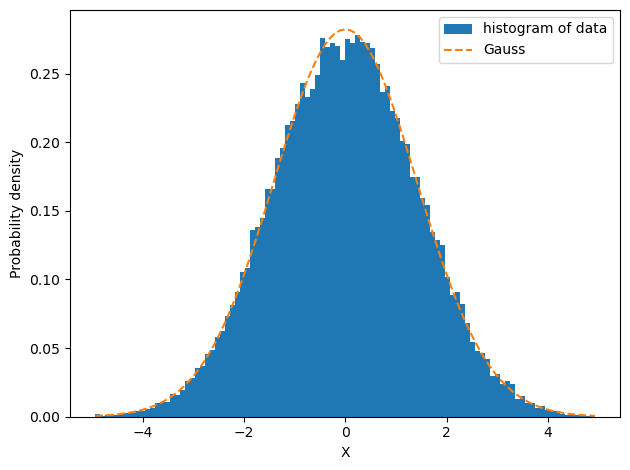

In [110]:
fig, ax = plt.subplots()
num_bins = 100

#画直方图
n, bins, patches = ax.hist(x, num_bins, density=True,label='histogram of data')

#取归一化的p
y = np.array([p(x_i)/0.708693 for x_i in bins])
ax.plot(bins, y, '--',label="Gauss")
ax.set_xlabel('X')
ax.set_ylabel('Probability density')

ax.legend()
fig.tight_layout()
plt.show()

In [111]:
#保存数据
df = pd.DataFrame(data=x)
df.to_csv("data_06.csv")